In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('지역별_2010부터_감염병발생빈도.csv')
data = pd.read_csv('지역별_2018부터_10만명당감염병발생비율.csv')

In [3]:
df[['수두','날짜', '구분', '시', '년']]

,수두,날짜,구분,시,년
0,6,2010-01,서울강남구,서울,2010
1,0,2010-01,서울강동구,서울,2010
2,0,2010-01,서울강북구,서울,2010
3,5,2010-01,서울강서구,서울,2010
4,6,2010-01,서울관악구,서울,2010
...,...,...,...,...,...
34539,13,2020-07,제주서귀포시,제주,2020
34540,37,2020-07,제주제주시,제주,2020
34541,0,2020-07,제주남제주군,제주,2020
34542,0,2020-07,제주북제주군,제주,2020


In [6]:
df['구분'].unique()

array(['서울강남구 ', '서울강동구 ', '서울강북구 ', '서울강서구 ', '서울관악구 ', '서울광진구 ',
       '서울구로구 ', '서울금천구 ', '서울노원구 ', '서울도봉구 ', '서울동대문구 ', '서울동작구 ',
       '서울마포구 ', '서울서대문구 ', '서울서초구 ', '서울성동구 ', '서울성북구 ', '서울송파구 ',
       '서울양천구 ', '서울영등포구 ', '서울용산구 ', '서울은평구 ', '서울종로구 ', '서울중구 ',
       '서울중랑구 ', '부산강서구 ', '부산금정구 ', '부산기장군 ', '부산남구 ', '부산동구 ', '부산동래구 ',
       '부산부산진구 ', '부산북구 ', '부산사상구 ', '부산사하구 ', '부산서구 ', '부산수영구 ',
       '부산연제구 ', '부산영도구 ', '부산중구 ', '부산해운대구 ', '대구남구 ', '대구달서구 ',
       '대구달성군 ', '대구동구 ', '대구북구 ', '대구서구 ', '대구수성구 ', '대구중구 ', '인천강화군 ',
       '인천계양구 ', '인천미추홀구 ', '인천남동구 ', '인천동구 ', '인천부평구 ', '인천서구 ',
       '인천연수구 ', '인천옹진군 ', '인천중구 ', '광주광산구 ', '광주남구 ', '광주동구 ', '광주북구 ',
       '광주서구 ', '대전대덕구 ', '대전동구 ', '대전서구 ', '대전유성구 ', '대전중구 ', '울산남구 ',
       '울산동구 ', '울산북구 ', '울산울주군 ', '울산중구 ', '경기가평군 ', '경기고양시 덕양구 ',
       '경기고양시 일산동구 ', '경기고양시 일산서구 ', '경기과천시 ', '경기광명시 ', '경기광주시 ',
       '경기구리시 ', '경기군포시 ', '경기김포시 ', '경기남양주시 ', '경기동두천시 ', '경기부천시 소사구 ',
       '경기부천시 오정구 ', '경기부천시 원미구

In [43]:
group_location_date = df[['수두', '날짜', '구분', '시', '년']].groupby(['구분', '날짜']).sum().reset_index()

In [44]:
group_location_date

,구분,날짜,수두,년
0,강원강릉시,2010-01,20,2010
1,강원강릉시,2010-02,24,2010
2,강원강릉시,2010-03,40,2010
3,강원강릉시,2010-04,37,2010
4,강원강릉시,2010-05,37,2010
...,...,...,...,...
34539,충북충주시,2020-03,23,2020
34540,충북충주시,2020-04,10,2020
34541,충북충주시,2020-05,12,2020
34542,충북충주시,2020-06,13,2020


# 월별 트렌드

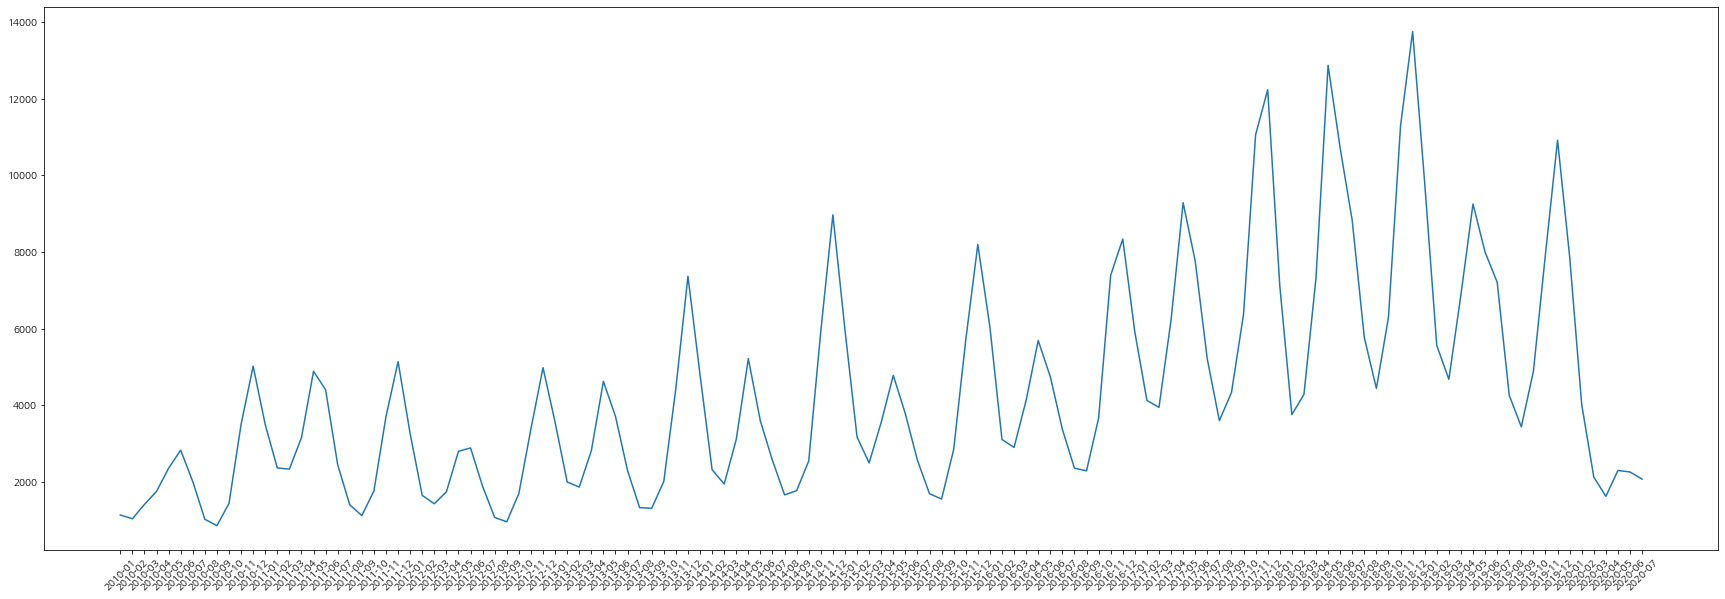

In [19]:
date = df[['수두','날짜', '구분', '시', '년']].groupby('날짜').sum().reset_index()
plt.figure(figsize = (30,10))
plt.plot(date['날짜'], date['수두'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
## 그래프를 보면, 전체는 의미가 꽤 있다고 볼 수 있음..

## 도시별  감염병 Trend

감염병 -> LSTM으로 예측을 할까..?   
조심해야할 기준을 만들어야 할 것 갈다.(언제 늘어나는지..!!)  
발생 예측이 아니라 감염병의 트렌드를 통해서 증감만..?!  
위험 증가의 예측  
  
3개월 -> 많이 발생한 감염병.
최근 발생 + 경향성 => 사전적으로 위험을 대비할 수 있게 만드는 효과가 있지 않을까

## 함수

In [10]:
## 빈도수 기반 그래프 그리는거

def plot_location_freq(location,disease):
    loc = df[[disease,'날짜', '구분', '년']][df['구분'] == '{} '.format(location) ]
    
    loc['날짜'] = loc['날짜'].apply(lambda x : str(x))
    loc[disease] = loc[disease].apply(lambda x : float(x))
    
    plt.figure(figsize = (30,10))
    plt.plot(loc['날짜'],loc[disease])
    plt.xticks(rotation=45)
    plt.title('{} 트렌드'.format(location+' '+disease), fontdict = {'fontsize': 40})
    plt.show()

In [20]:
## 인구 10만명당 그래프 그리는거

def plot_location_ratio(location,disease):
    loc = data[[disease,'날짜', '구분', '년']][data['구분'] == '{} '.format(location) ]
    
    loc['날짜'] = loc['날짜'].apply(lambda x : str(x))
    loc[disease] = loc[disease].apply(lambda x : float(x))
    
    plt.figure(figsize = (30,10))
    plt.plot(loc['날짜'],loc[disease])
    plt.xticks(rotation=45)
    plt.title('{} 트렌드'.format(location+' '+disease), fontdict = {'fontsize': 40})
    plt.show()

## 서울시 노원구

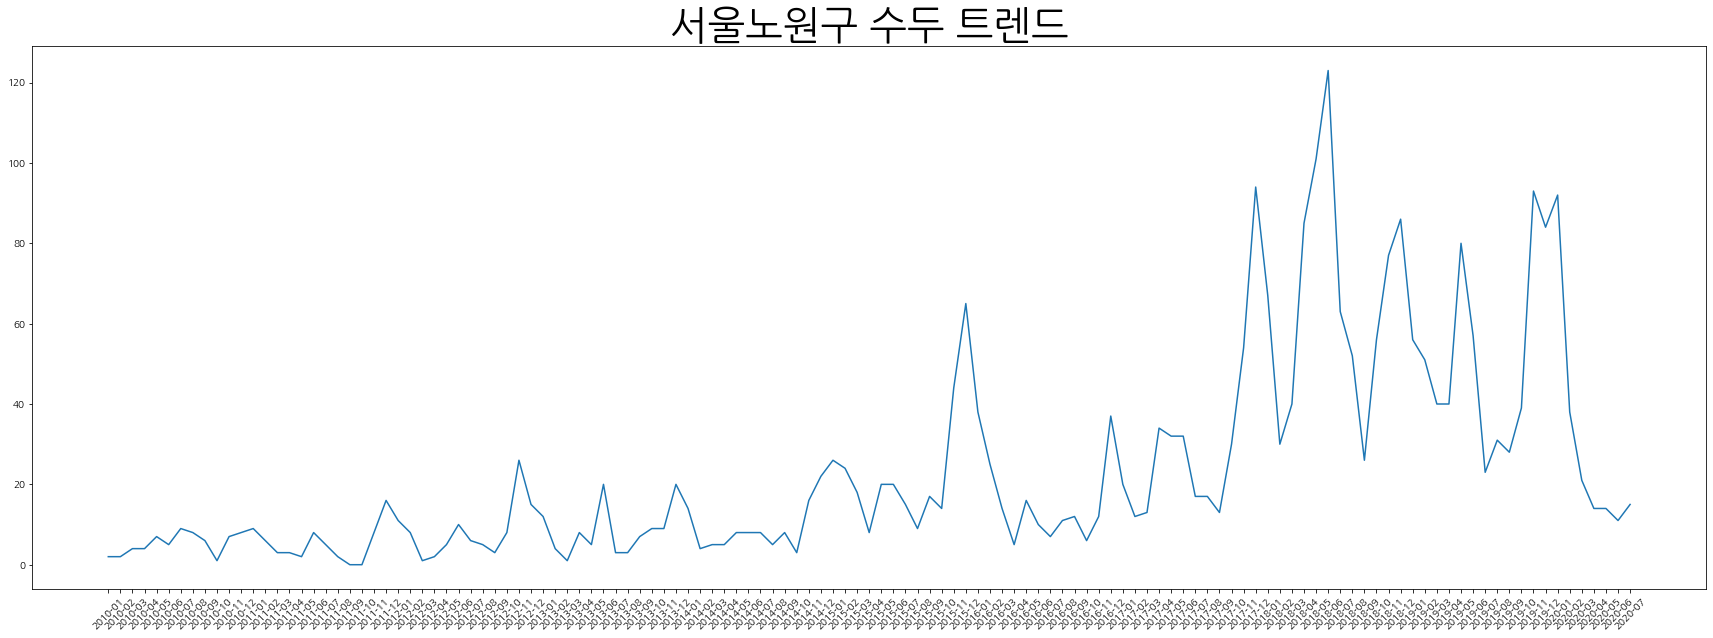

In [21]:
plot_location_freq('서울노원구', '수두') # 빈도수

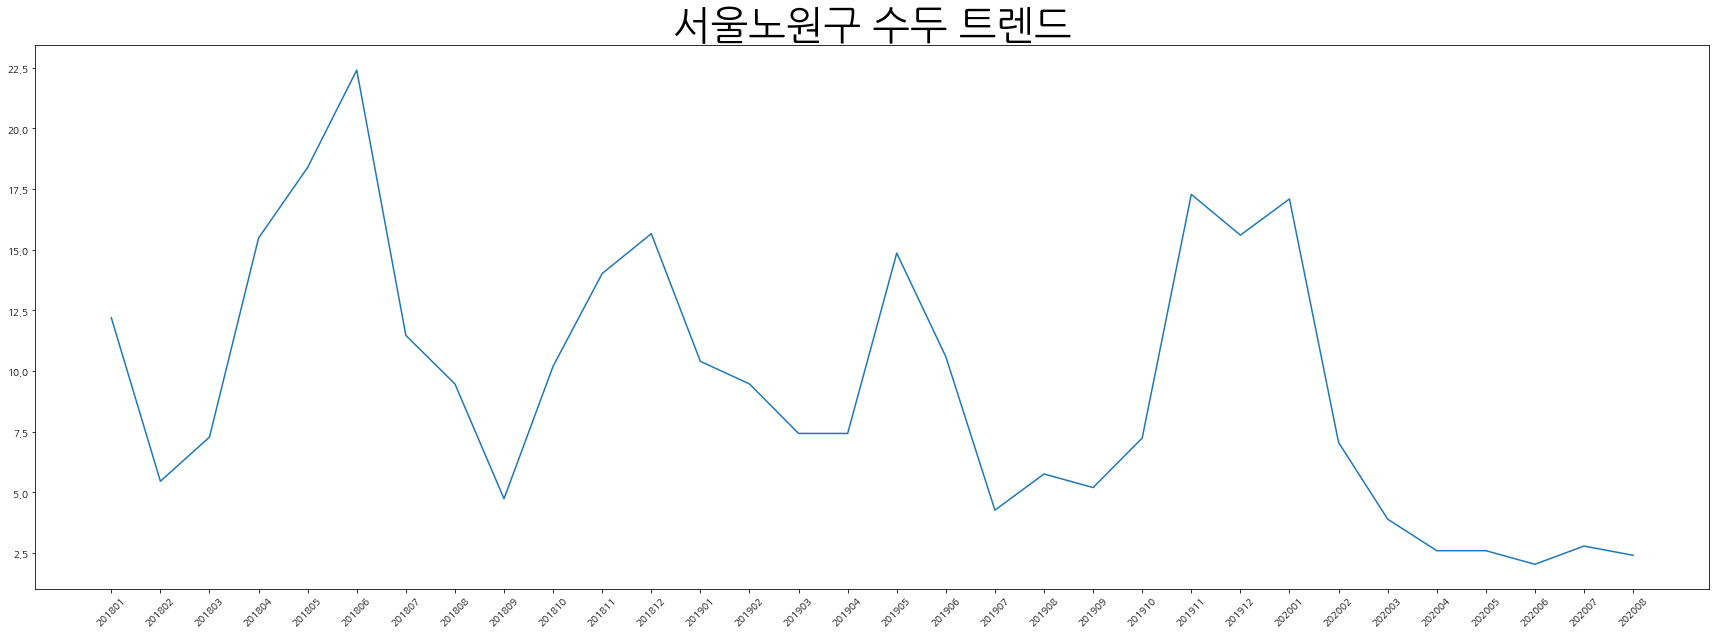

In [22]:
plot_location_ratio('서울노원구', '수두') # 2018년도부턴데, 생긴건 확실히 비슷하다.. 비율

### 시사점 : 노원구 자체가 인구가 많아서, 10만명당 발생률을 진짜 기준으로 해야지 좀더 와닿을듯
=> 해보니까 그래프 생기는거 똑같더라..

## 서울시 중구


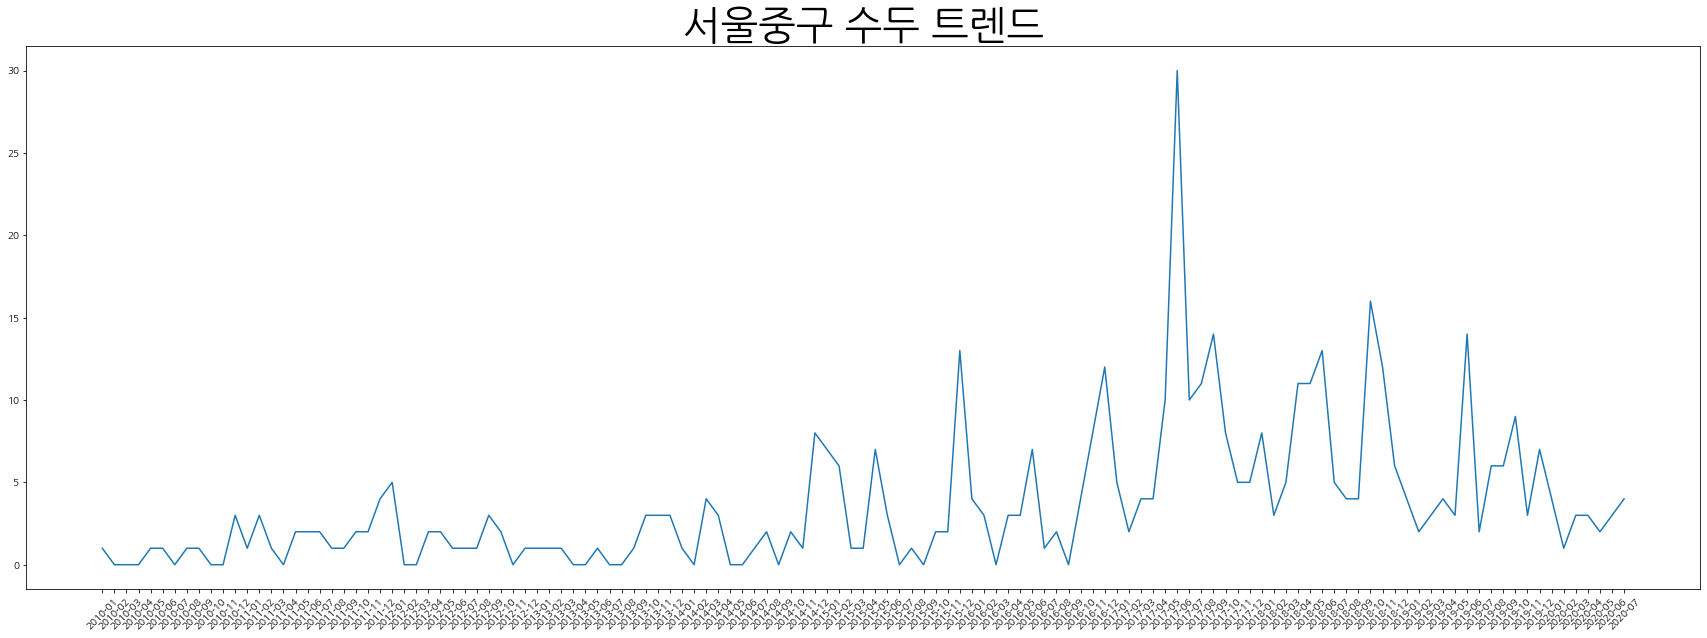

In [23]:
plot_location_freq('서울중구', '수두') # 빈도수 단순 확진자수

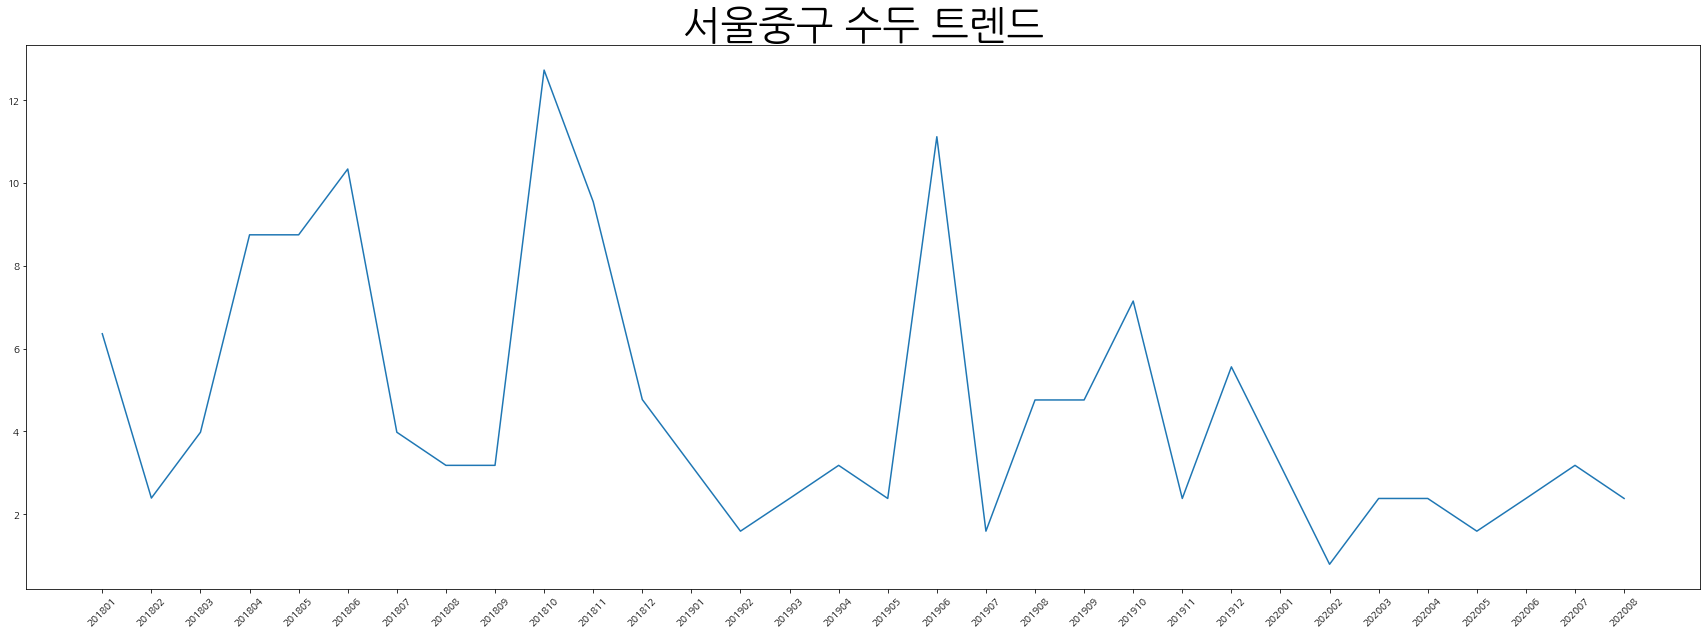

In [25]:
plot_location_ratio('서울중구', '수두') # 비율

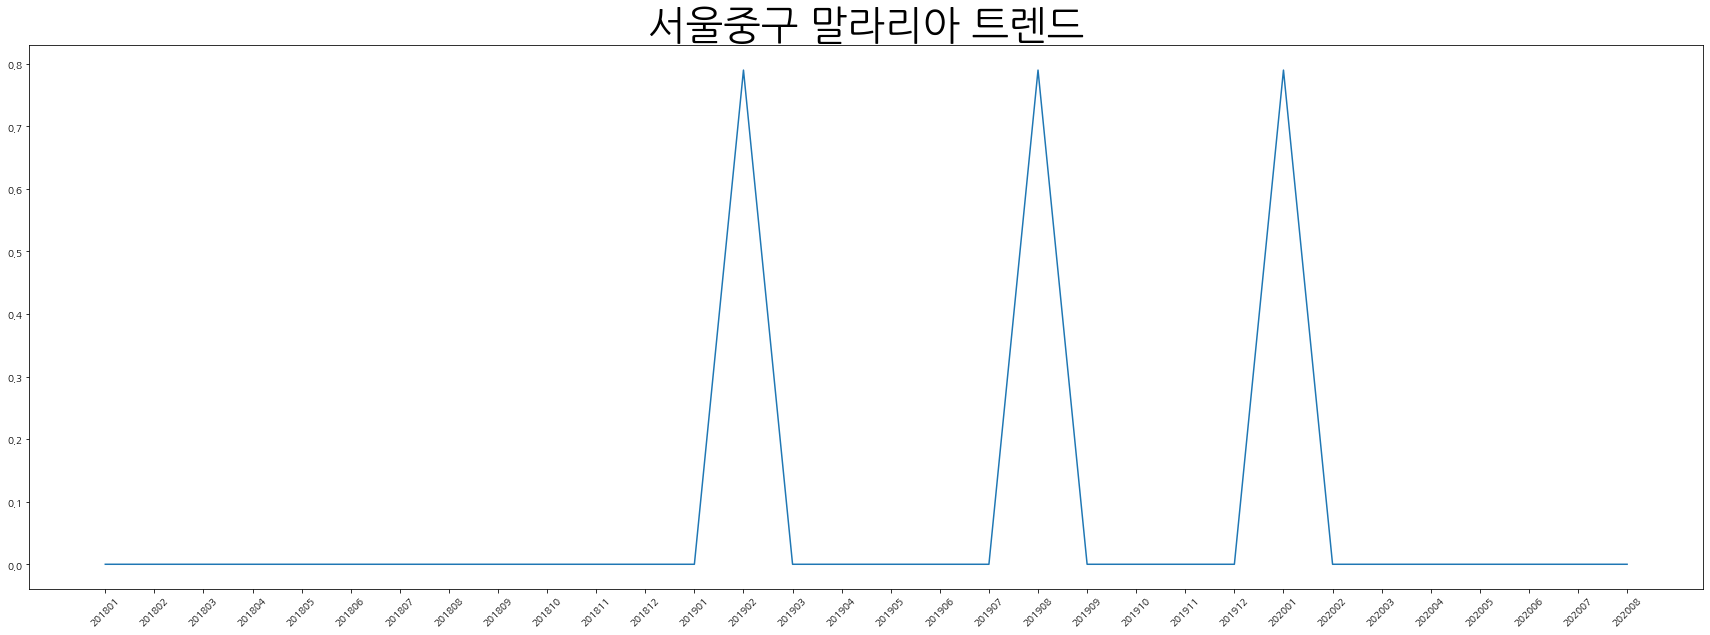

In [26]:
plot_location_ratio('서울중구', '말라리아') # 빈도수 단순 확진자수

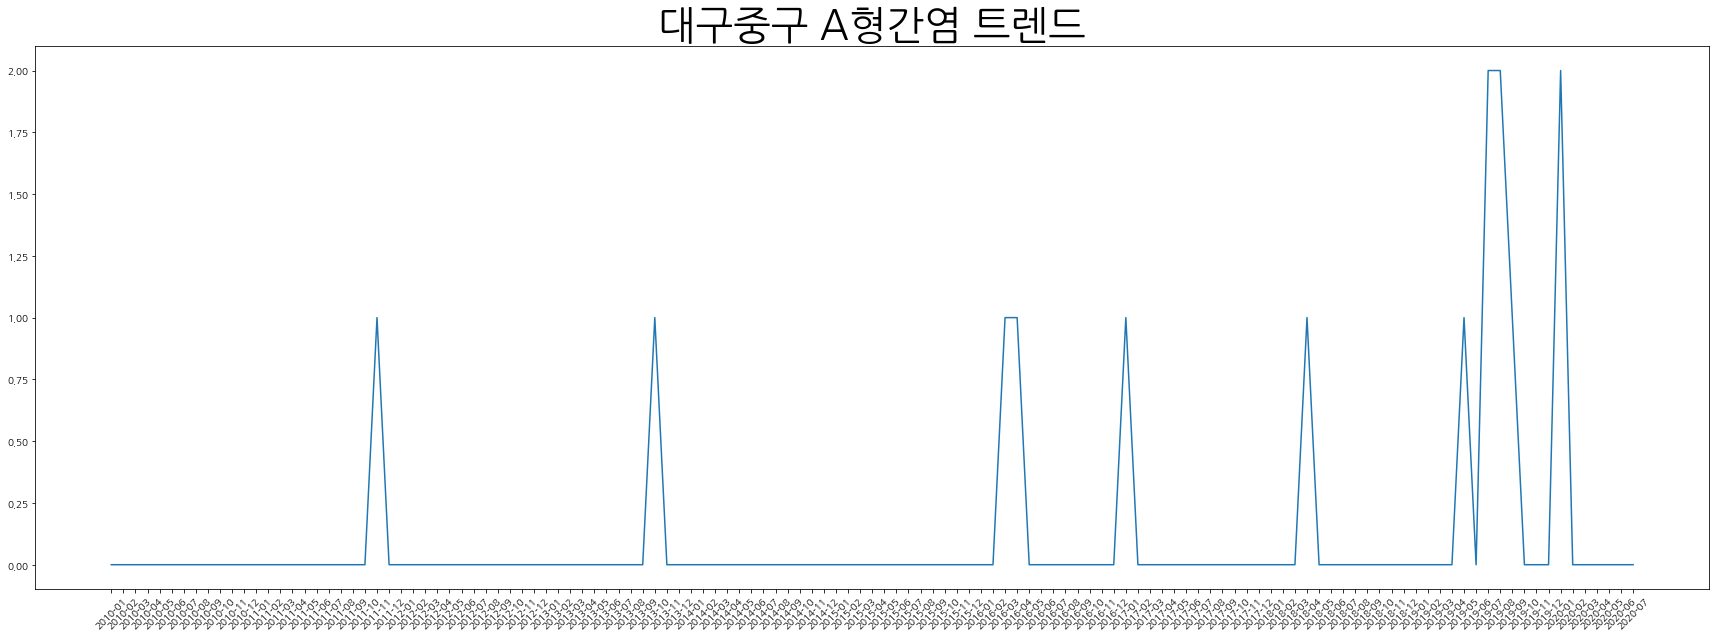

In [30]:
plot_location_freq('대구중구', 'A형간염') # 빈도수 단순 확진자수

## 10만명당 발생률을 기준으로 하는데, 그래프는 빈도랑 똑같이나옴

In [69]:
col = ['에볼라바이러스병 ', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열',
       '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군',
       '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자',
       '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증',
       'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오',
       '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열',
       '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍',
       'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열',
       '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열',
       '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열',
       '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열', '중증열성혈소판감소증후군(SFTS)', '지카바이러스감염증',
       '날짜', '구분', '년']

In [13]:
def plot_location_ratio(location,disease):
    loc = data[[disease,'날짜', '구분', '년']][data['구분'] == '{} '.format(location) ]
    
    loc['날짜'] = loc['날짜'].apply(lambda x : str(x))
    loc[disease] = loc[disease].apply(lambda x : float(x))
    
    plt.figure(figsize = (30,10))
    plt.plot(loc['날짜'],loc[disease])
    plt.xticks(rotation=45)
    plt.title('{} 트렌드'.format(location+' '+disease), fontdict = {'fontsize': 40})
    plt.show()

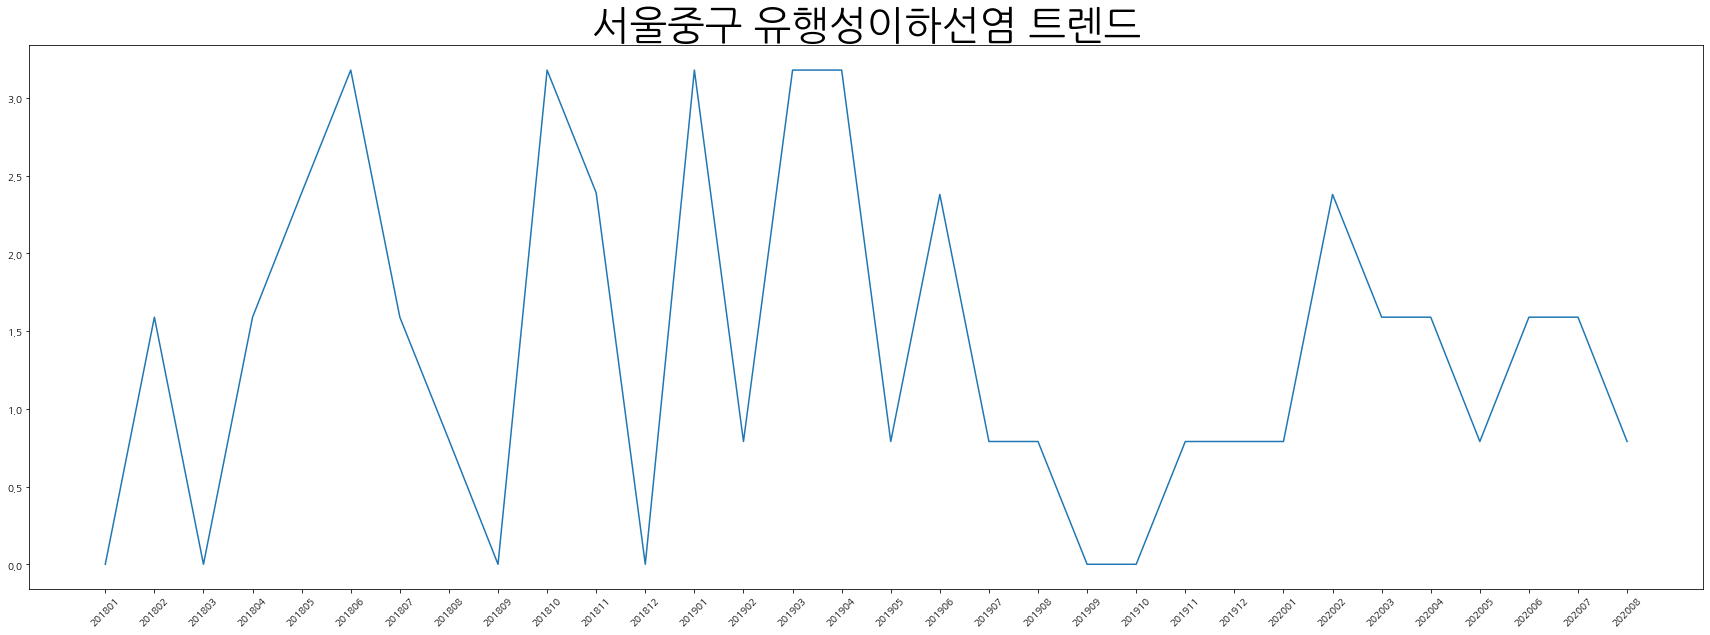

In [32]:
plot_location_ratio('서울중구', '유행성이하선염')

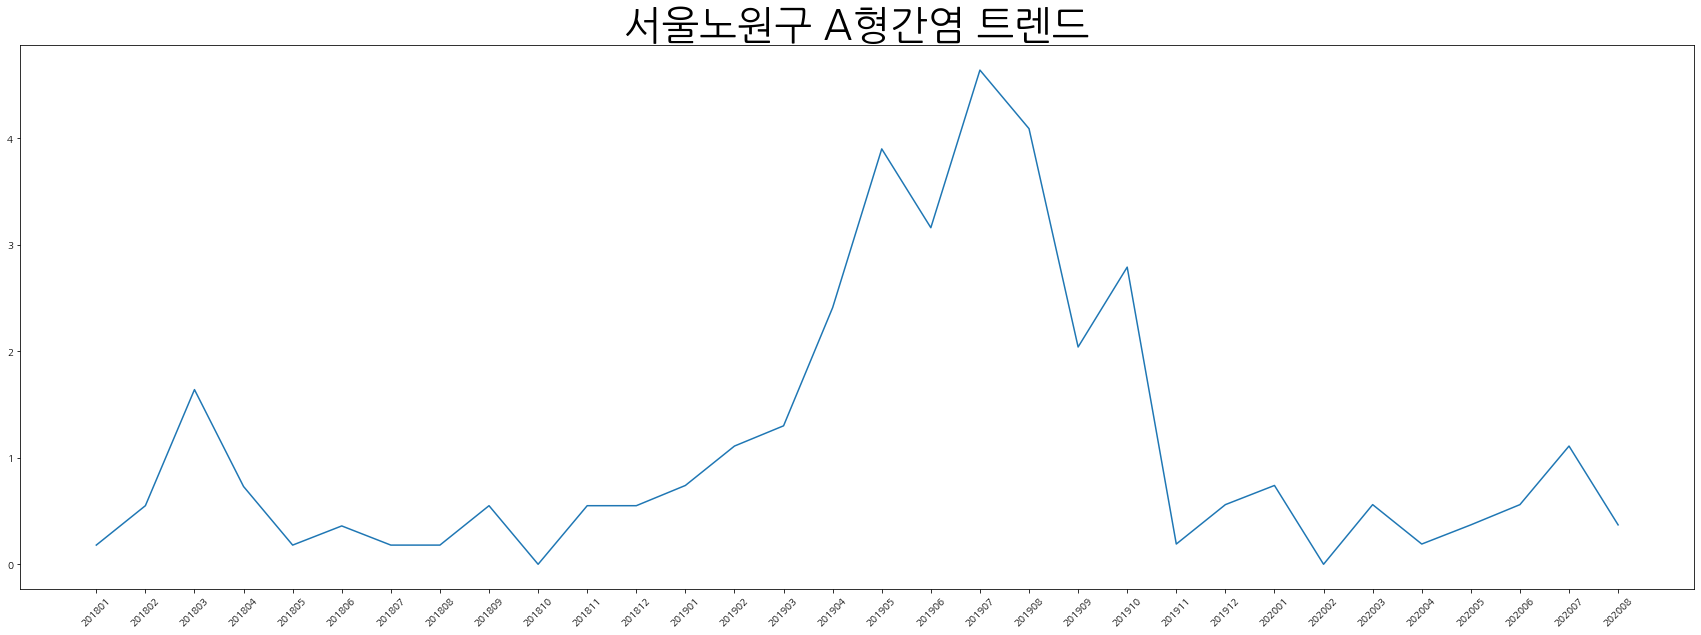

In [121]:
plot_location_ratio('서울노원구', 'A형간염')

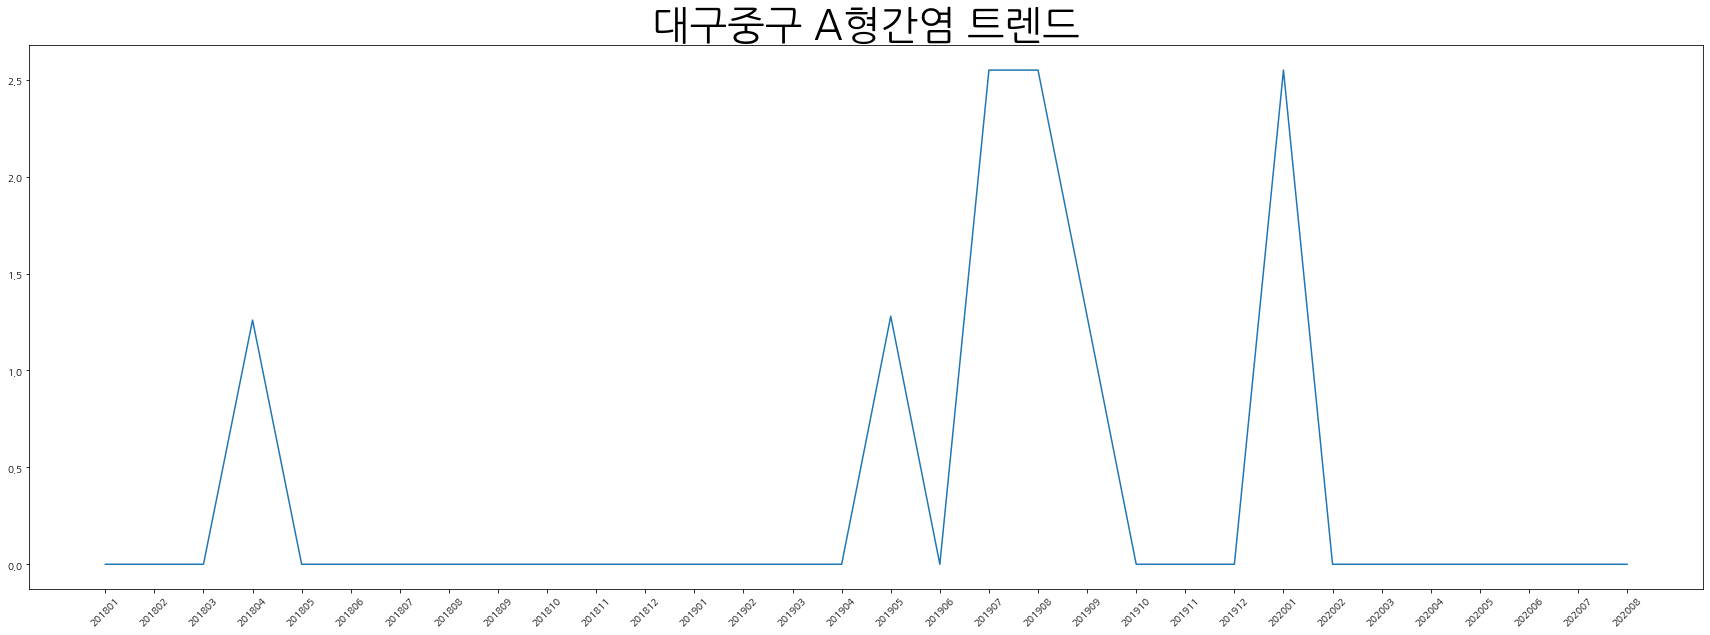

In [122]:
plot_location_ratio('대구중구', 'A형간염')

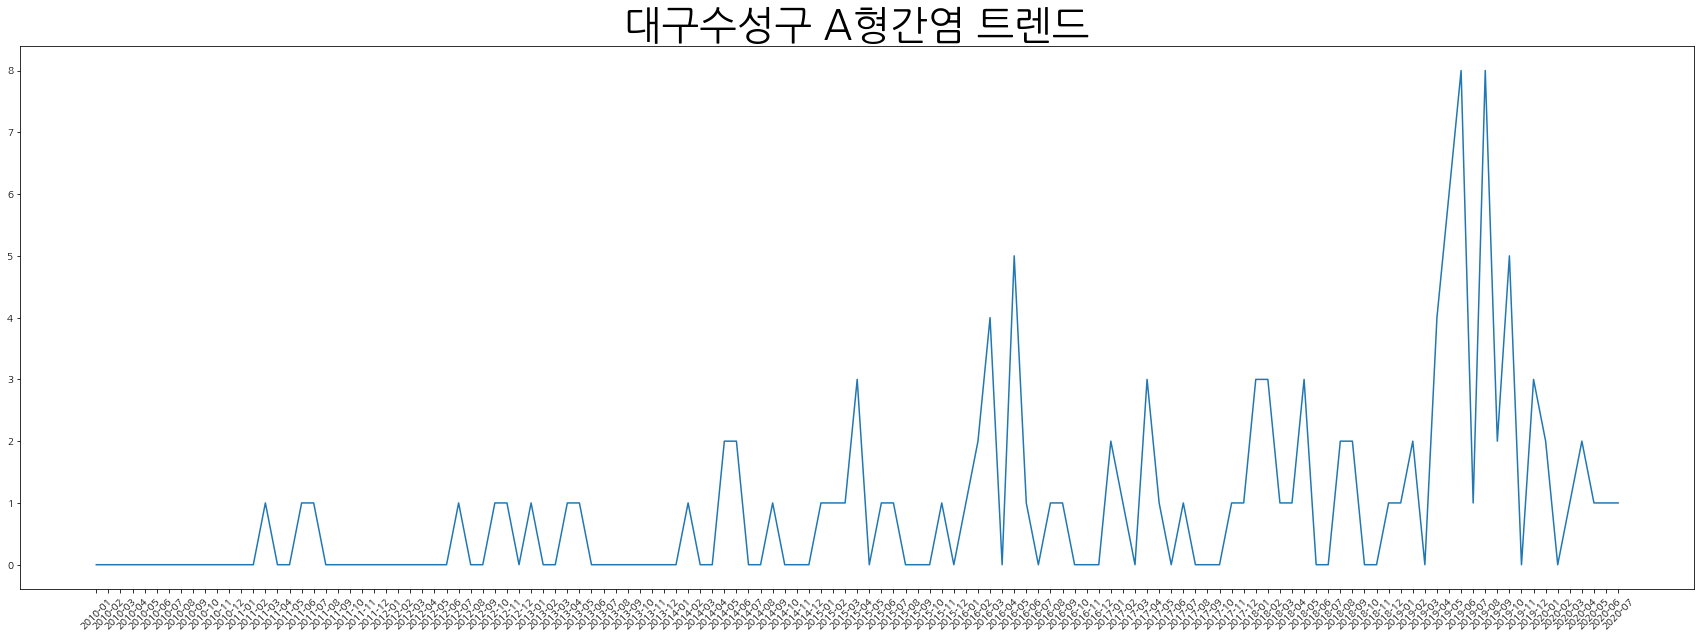

In [45]:
plot_location_freq('대구수성구', 'A형간염')

## LSTM 써보기

In [34]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=629c70711cf5e16a0549f619bc22397e63d959c3643232bb5ec362a243d7321e
  Stored in directory: c:\users\mingy\appdata\local\pip\cache\wheels\93\2a\eb\e58dbcbc963549ee4f065ff80a59f274cc7210b6eab962acdc
Successfully built termcolor
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0


In [35]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [ ]:
disease = np.array([[[data[i+j]] for j in range(10)] for i in range(len(data)-9-1)])
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape

## 감염병 취약계층

해외만...

=> 임산부 => 아이키우는 엄마아빠, 걱정은 돼
취약계층 타겟팅.